<span style="color:	#008080 ; font-size:20px">Mihaela Strimbeschi</span>

<div style="text-align:center; color:#008080; font-size:20px">
  <h3>eBAY PERFUME PICKS</h3>
</div>

---
<div style="text-align:left; color:	#008080 ; font-size:15px">
<h3>Introduction</h3>
</div>

 Understanding perfume sales trends is key for brands and sellers in a competitive market. This analysis explores key factors such as brand popularity, pricing, product types, and seller locations to identify consumer preferences and sales drivers.

<div style="text-align:left; color:	#008080 ; font-size:15px">
<h3>Objective</h3>
</div>

This analysis aims to provide insights into perfume sales trends, helping businesses and sellers make data-driven decisions to optimize their strategies and improve market positioning.
 The analysis aims to answer the following questions:

<div style="text-align:left; color:	#008080 ; font-size:15px">
<h3>Questions</h3>
</div>

---
1. Which are the top 10 best-selling perfume brands?
2. What kind of perfumes do people prefer?
3. Are men's perfumes more expensive than women's?
4. How are perfume sales distributed across different countries?
5. Where are most sellers located?
6. Do perfumes with higher stock sell more?
7. Do budget perfumes sell more than luxury perfumes?

---



<div style="text-align:left; color:	#008080 ; font-size:15px">
<h3>About the Dataset</h3>
</div>



**Dataset Overview**

The Perfume E-Commerce Dataset 2024 comprises detailed information on 2000 perfume listings sourced from eBay, split into two separate CSV files for men's and women's perfumes, each containing 1000 entries. This dataset provides a comprehensive view of the current market trends, pricing, availability, and geographical distribution of perfumes in the e-commerce space. 

---
[Link data Kaggle](https://www.kaggle.com/datasets/kanchana1990/perfume-e-commerce-dataset-2024/data) 

---

**Column Descriptors**

1. ***brand***: The brand of the perfume.
2. ***title***: The title of the listing.
3. ***type***: The type of perfume (e.g., Eau de Parfum, Eau de Toilette).
4. ***price***: The price of the perfume.
5. ***priceWithCurrency***: The price with currency notation.
6. ***available***: The number of items available.
7. ***availableText***: Text description of availability.
8. ***sold***: The number of items sold.
9. ***lastUpdated***: The last updated timestamp of the listing.
10. ***itemLocation***: The location of the item.
---

### Step 1: Importing Necessary Libraries


I will import libraries for data analysis and interactive visualizations.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10
import numpy as np

output_notebook()

Loading BokehJS ...

### Step 2: Loading and Inspecting the Data


To access and view our data I use the **pd.read_csv** function as the data is stored in a CSV.

In [7]:
# Loading the data
mens_perfume = pd.read_csv('ebay_mens_perfume.csv')
womens_perfume = pd.read_csv('ebay_womens_perfume.csv')

Firstly, I will check the men's perfume dataset, followed by the women's perfume dataset, to get an overview of both datasets.

**Men's Perfume Dataset - Initial Overview**

After importing and loading both datasets it’s essential to perform some basic checks:

 1. First, I will inspect the first five rows of **mens_perfume** dataset with **.head()** method to understand the structure.

    *5 is the default amount of rows. The number of rows can be changed by passing the specified number within the print function.*

In [11]:
mens_perfume_head = mens_perfume.head()
mens_perfume_head

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"


2. Next, let's gather more information about the data using the **.info()** method.

In [13]:
mens_perfume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              999 non-null    object 
 1   title              1000 non-null   object 
 2   type               997 non-null    object 
 3   price              1000 non-null   float64
 4   priceWithCurrency  1000 non-null   object 
 5   available          889 non-null    float64
 6   availableText      997 non-null    object 
 7   sold               994 non-null    float64
 8   lastUpdated        947 non-null    object 
 9   itemLocation       1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.3+ KB


*Result Explained*

The result tells us there are 1000 rows and 10 columns

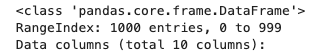


Including the name of each column, with the data type(Dtype):   
***brand, title, type, price, priceWithCurrency, available, availableText, sold, lastUpdated, and itemLocation*** 


Moreover, the info() method also tells us how many Non-Null values there are present in each column, and in our data set it seems like there are some missing values for columns: *brand, type, available, availableText, sold, lastUpdated*

3. Missing values for mens_perfume dataset

To see how many missing values there are, I'll check and count them using the **.isnull().sum()**

In [18]:
mens_perfume.isnull().sum()

brand                  1
title                  0
type                   3
price                  0
priceWithCurrency      0
available            111
availableText          3
sold                   6
lastUpdated           53
itemLocation           0
dtype: int64

*Result Explained*

As we can see, the total number of missing values in each column are as follows:  brand (1 missing), type (3 missing), available (111 missing), availableText (3 missing), sold (6 missing), lastUpdated (53 missing)

In [20]:
mens_perfume.describe()

,price,available,sold
count,1000.000000,889.000000,994.000000
mean,46.481200,20.046119,766.266600
std,35.527862,61.547985,3200.971733
min,3.000000,2.000000,1.000000
25%,22.990000,5.000000,14.000000
50%,35.710000,10.000000,49.500000
75%,59.000000,10.000000,320.500000
max,259.090000,842.000000,54052.000000


**Women's Perfume Dataset - Initial Overview**

For the second dataset, I will follow the same steps to get an initial overview as I did with the first dataset.

1. First, I will inspect the first five rows of **womens_perfume** dataset with **.head()** method to understand the structure.

In [24]:
womens_perfume.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,US $43.99/ea,2.0,2 available / 393 sold,393.0,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States"
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,US $79.99,5.0,5 available / 40 sold,40.0,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong"
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,US $59.99,10.0,More than 10 available / 35 sold,35.0,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States"
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,US $59.99/ea,10.0,More than 10 available / 9 sold,9.0,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong"
4,Khadlaj,Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...,Eau de Parfum,29.99,US $29.99/ea,10.0,More than 10 available,NaN,NaN,"Little Ferry, New Jersey, United States"


2. I'll gather more details about the data using the info() method.

In [26]:
womens_perfume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              999 non-null    object 
 1   title              1000 non-null   object 
 2   type               998 non-null    object 
 3   price              1000 non-null   float64
 4   priceWithCurrency  1000 non-null   object 
 5   available          869 non-null    float64
 6   availableText      992 non-null    object 
 7   sold               984 non-null    float64
 8   lastUpdated        927 non-null    object 
 9   itemLocation       1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.3+ KB


*Result Explained*

Similar to the men's perfume dataset, the women's perfume dataset also contains 1,000 rows and 10 columns.

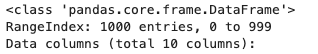

And here we have some missing values in the following columns: *brand, type, available, availableText, sold, and lastUpdated* for see exactly how many I will use the .isnull().sum()

3. Missing values for womens_perfume dataset

In [30]:
womens_perfume.isnull().sum()

brand                  1
title                  0
type                   2
price                  0
priceWithCurrency      0
available            131
availableText          8
sold                  16
lastUpdated           73
itemLocation           0
dtype: int64

*Result Explained*

As we can see, the total number of missing values in each column are as follows: brand (1 missing), type (2 missing), available (131 missing), availableText (8 missing), sold (16 missing), and lastUpdated (73 missing).

### Step 3: Data Cleaning


**Handling Missing Values**

Before making any changes to the original data, I will create a copy of it for both datasets.This ensures I can always revert back to the original if needed.

**3.1** Make copies of both datasets

In [36]:
mens_perfume_copy = mens_perfume.copy() # copy of the men's perfume dataset
womens_perfume_copy = womens_perfume.copy() # copy of the women's perfume dataset

**3.2** Handle missing values in necessary columns from copies of original datasets

- ***'brand' column***: I will replace the missing values in the 'brand' column with 'Unknown' because I consider it important for my analysis, and this will help retain data integrity

- ***'type'column***: I will replace the missing values in the 'type' column with 'Unknown', because product type is essential for categorization and customer profiling. And replacing missing values ensures no data is lost.

- ***'available'column***: I will replace the missing values in the 'available' column with '0'. Missing stock data likely means the product isn't available and replacing it with '0' keeps the data consistent without dropping rows.

- ***'sold'***: Missing sales data likely indicates no sales. Here I will replace with '0' because this allows for accurate analysis without discarding data.

In [41]:
mens_perfume_copy = mens_perfume_copy.fillna({
    'brand': 'Unknown',
    'type': 'Unknown',
    'available': 0,
    'sold': 0,  
})

In [42]:
womens_perfume_copy = womens_perfume_copy.fillna({
    'brand': 'Unknown',
    'type': 'Unknown',
    'available': 0,
    'sold': 0,
})

Because the 'availableText' and lastUpdated' columns are not crucial for my analysis, I will drop them with .drop() method

In [44]:
# drop unnecessary columns
mens_perfume_copy = mens_perfume_copy.drop(columns=['availableText', 'lastUpdated'])
womens_perfume_copy = womens_perfume_copy.drop(columns=['availableText', 'lastUpdated'])

**3.3** Verify that missing values have been handled by using ***.isnull().sum()***. 

In [46]:
mens_perfume_copy.isnull().sum()

brand                0
title                0
type                 0
price                0
priceWithCurrency    0
available            0
sold                 0
itemLocation         0
dtype: int64

In [47]:
womens_perfume_copy.isnull().sum()

brand                0
title                0
type                 0
price                0
priceWithCurrency    0
available            0
sold                 0
itemLocation         0
dtype: int64

Now that I have ensured there are no missing values in either dataset, the next important step in data cleaning is to check for duplicates.

**Check for duplicates**

In [50]:
mens_perfume_copy.duplicated().sum()

0

In the mens_perfume_copy there are not duplicates : 0 

In [52]:
womens_perfume_copy.duplicated().sum()

1

In the women's_perfume_copy dataset, I found one duplicate.

In [54]:
# display duplicate rows for the women's dataset
duplicates_women = womens_perfume_copy[womens_perfume_copy.duplicated(keep=False)]
duplicates_women

,brand,title,type,price,priceWithCurrency,available,sold,itemLocation
344,FLOWER,12 Piece Woman’s Perfume Lot: Assorted scents ...,Perfume,48.0,US $48.00,4.0,1.0,"Webster, Florida, United States"
662,FLOWER,12 Piece Woman’s Perfume Lot: Assorted scents ...,Perfume,48.0,US $48.00,4.0,1.0,"Webster, Florida, United States"


To remove the duplicates, I will use **.drop_duplicates()** with the **(inplace=True)** parameter to make sure the changes are applied directly to the ***womens_perfume_copy*** DataFrame, as follows:

In [56]:
#remove duplicates
womens_perfume_copy.drop_duplicates(inplace=True)

In [57]:
# check if duplicates were removed 
duplicates_check = womens_perfume_copy.duplicated().sum()
duplicates_check

0

I wil reset the index to create a clean, consecutive numbering of rows after removing duplicates, ensuring the index reflects the current data structure without gaps.

In [59]:
womens_perfume_copy.reset_index(drop=True, inplace=True)

In [60]:
# verify the data
womens_perfume_copy.head()

,brand,title,type,price,priceWithCurrency,available,sold,itemLocation
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,US $43.99/ea,2.0,393.0,"Thomasville, Alabama, United States"
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,US $79.99,5.0,40.0,"New Jersey, Hong Kong"
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,US $59.99,10.0,35.0,"Orange, New Jersey, United States"
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,US $59.99/ea,10.0,9.0,"USA, New Jersey, Hong Kong"
4,Khadlaj,Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...,Eau de Parfum,29.99,US $29.99/ea,10.0,0.0,"Little Ferry, New Jersey, United States"


**Data type correction**

Because the **'available'** and **'sold'** columns refer to the number of items in stock and sold, respectively, and they are represented as float values, I will convert them to integers. Stock counts should be whole numbers, not fractional values, as decimals do not accurately reflect the actual number of perfumes available or sold.

To do this, I will use the ***.astype(int)*** method to convert the values to integers.

In [63]:
#convert floats to integers for cols 'available' and 'sold' for mens_perfume_copy

mens_perfume_copy['available'] = mens_perfume_copy['available'].astype(int)
mens_perfume_copy['sold'] = mens_perfume_copy['sold'].astype(int)

In [64]:
#convert floats to integers for cols 'available' and 'sold' for womens_perfume_copy

womens_perfume_copy['available'] = womens_perfume_copy['available'].astype(int)
womens_perfume_copy['sold'] = womens_perfume_copy['sold'].astype(int)

In [65]:
womens_perfume_copy.head(2)

,brand,title,type,price,priceWithCurrency,available,sold,itemLocation
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,US $43.99/ea,2,393,"Thomasville, Alabama, United States"
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,US $79.99,5,40,"New Jersey, Hong Kong"


I will **Rename column** - ***priceWithCurrency*** for better readability and remove 'US' from the price


In [67]:
# rename the column to 'price_usd_unit'
mens_perfume_copy.rename(columns={'priceWithCurrency': 'price_usd_unit'}, inplace=True)
womens_perfume_copy.rename(columns={'priceWithCurrency': 'price_usd_unit'}, inplace=True)

# display the updated column names to confirm the change
mens_perfume_copy.columns, womens_perfume_copy.columns

(Index(['brand', 'title', 'type', 'price', 'price_usd_unit', 'available',
        'sold', 'itemLocation'],
       dtype='object'),
 Index(['brand', 'title', 'type', 'price', 'price_usd_unit', 'available',
        'sold', 'itemLocation'],
       dtype='object'))

In [68]:
# remove "US " from the price
mens_perfume_copy['price_usd_unit'] = mens_perfume_copy['price_usd_unit'].str.replace('US ', '', regex=False)
womens_perfume_copy['price_usd_unit'] = womens_perfume_copy['price_usd_unit'].str.replace('US ', '', regex=False)

In [69]:
mens_perfume_copy.head()
womens_perfume_copy.head()

,brand,title,type,price,price_usd_unit,available,sold,itemLocation
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,$43.99/ea,2,393,"Thomasville, Alabama, United States"
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,$79.99,5,40,"New Jersey, Hong Kong"
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,$59.99,10,35,"Orange, New Jersey, United States"
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,$59.99/ea,10,9,"USA, New Jersey, Hong Kong"
4,Khadlaj,Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...,Eau de Parfum,29.99,$29.99/ea,10,0,"Little Ferry, New Jersey, United States"


In [70]:
#check information after cleaning 
mens_perfume_copy.info()
womens_perfume_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           1000 non-null   object 
 1   title           1000 non-null   object 
 2   type            1000 non-null   object 
 3   price           1000 non-null   float64
 4   price_usd_unit  1000 non-null   object 
 5   available       1000 non-null   int64  
 6   sold            1000 non-null   int64  
 7   itemLocation    1000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           999 non-null    object 
 1   title           999 non-null    object 
 2   type            999 non-null    object 
 3   price           999 non-null    float64
 4   pri

In [71]:
mens_perfume_copy['type'].unique

<bound method Series.unique of 0        Eau de Parfum
1        Eau de Parfum
2      Eau de Toilette
3      Eau de Toilette
4           Fragrances
            ...       
995    Eau de Toilette
996    Eau de Toilette
997    Eau de Toilette
998    Eau de Toilette
999      Cologne spray
Name: type, Length: 1000, dtype: object>

In [72]:
mens_perfume_copy['type'] = mens_perfume_copy['type'].str.title()

In [73]:
corrections_mens = {
    'Eau de Perfume': 'Eau de Parfum',
    'Eau De Parfum': 'Eau de Parfum',  
    'Eau-de-Parfum': 'Eau de Parfum',
    'Perfume': 'Eau de Parfum',
    'Eau De Perfume':  'Eau de Parfum', 
    'Parfum' :  'Eau de Parfum', 
   'Eau De Toilette': 'Eau de Toilette',   
}
mens_perfume_copy['type'] = mens_perfume_copy['type'].replace(corrections_mens)

In [74]:
def correct_type(value):
    return corrections_mens.get(value, value)

In [75]:
mens_perfume_copy['type'] = mens_perfume_copy['type'].astype(str)  
mens_perfume_copy['type'] = mens_perfume_copy['type'].str.strip()  
mens_perfume_copy['type'] = mens_perfume_copy['type'].apply(correct_type)

In [76]:
print(mens_perfume_copy['type'].value_counts())

type
Eau de Toilette                                          454
Eau de Parfum                                            377
Eau De Cologne                                            57
Fragrances                                                32
Gift Sets                                                  6
Cologne                                                    6
Body Spray                                                 4
Edt                                                        4
Unknown                                                    3
Aftershave                                                 3
/                                                          3
Does Not Apply                                             3
Parfum Intense                                             3
Eau De Parfum Intense                                      3
Extrait De Parfum                                          3
Le Parfum                                                  3
Pheromone          

In [77]:
womens_perfume_copy['type'] = womens_perfume_copy['type'].str.title()

In [78]:
corrections = {
    'Eau de Perfume': 'Eau de Parfum',
    'Eau De Parfum': 'Eau de Parfum',  
    'Eau-de-Parfum': 'Eau de Parfum',
    'Eau De Perfume': 'Eau de Parfum',
   'Eau De Toilette': 'Eau de Toilette',
    'Eau De Toilette, Spray': 'Eau de Toilette',
    'Eau De Parfum/Perfume' : 'Eau de Parfum' ,   
}
womens_perfume_copy['type'] = womens_perfume_copy['type'].replace(corrections)

In [79]:
def correct_type(value):
    return corrections.get(value, value)

In [80]:
womens_perfume_copy['type'] = womens_perfume_copy['type'].astype(str)  
womens_perfume_copy['type'] = womens_perfume_copy['type'].str.strip()  
womens_perfume_copy['type'] = womens_perfume_copy['type'].apply(correct_type)

In [81]:
print(womens_perfume_copy['type'].value_counts())

type
Eau de Parfum                      602
Eau de Toilette                    197
Perfume                             55
Eau De Cologne                      38
Fragrances                          14
                                  ... 
Edp                                  1
Perfume Fragrance Mist               1
Parfum, Lotion, Gloss And Blush      1
Bath Oil                             1
1                                    1
Name: count, Length: 63, dtype: int64


### Step 4: Combining the Data


Before combining the data, I will create a new column named 'category' to label the data as 'men' and 'women'

In [84]:
#add new columns: category 
mens_perfume_copy['category'] = 'men'
womens_perfume_copy['category'] = 'women'

I use the concatenation method for a more comprehensive analysis. It allows me to combine two datasets with the same structure into one, facilitating a more complete view of the data.

In [86]:
# combine datasets
combined_perfume = pd.concat([mens_perfume_copy, womens_perfume_copy], ignore_index=True)

In [87]:
#check if the new col is added using .tail() for the last 5 
combined_perfume.tail()

,brand,title,type,price,price_usd_unit,available,sold,itemLocation,category
1994,Avon,Avon Far Away Infinity Eau de Parfum 1.7 fl. o...,Eau de Parfum,13.89,$13.89,10,157,"West Palm Beach, Florida, United States",women
1995,Mancera,Roses Greedy by Mancera perfume for unisex EDP...,Eau de Parfum,57.85,$57.85/ea,33,58,"Dallas, Texas, United States",women
1996,Unbranded,"Sweet Tooth Eau de Parfum, Perfume for Women, ...",1,30.96,$30.96,2,3,"New York, New York, United States",women
1997,Juliette Has A Gun,MMMM BY Juliette Has A Gun perfume for her EDP...,Eau de Parfum,53.99,$53.99/ea,3,117,"Dallas, Texas, United States",women
1998,Paris Hilton,PARIS HILTON ELECTRIFY for Women Cologne 3.4 o...,Eau de Parfum,14.99,$14.99/ea,4,51,"TX, United States",women


In [88]:
combined_perfume.describe()

,price,available,sold
count,1999.000000,1999.000000,1999.000000
mean,43.184682,18.227614,625.828914
std,32.627610,53.673779,2457.887343
min,1.990000,0.000000,0.000000
25%,21.965000,3.000000,14.000000
50%,34.000000,9.000000,49.000000
75%,53.990000,10.000000,278.500000
max,299.990000,842.000000,54052.000000


### Step 5: Analysis and visualisation

<div style="text-align:left; color:	#008080 ; font-size:15px">
<h3>1. Which are the top 10 best-selling perfume brands</h3>
</div>

In [91]:
top_brands = combined_perfume.groupby('brand')['sold'].sum().sort_values(ascending=False).head(10)

top_brands_list = top_brands.index.tolist()
num_brands = len(top_brands_list)
# use at most 10 colors
palette = Category10[min(num_brands, 10)]  

# create a new ColumnDataSource for the bar chart
brand_source = ColumnDataSource(data=dict(brands=top_brands_list, sales=top_brands.values))

# bar chart for top selling brands
p1 = figure(x_range=top_brands_list, height=400, title='1. Which are the top 10 best-selling perfume brands',
            toolbar_location=None, tools="")

# hover tool to display brand and sales
hover = HoverTool()
hover.tooltips = [('Brand', '@brands'), ('Total Sales', '@sales')]
p1.add_tools(hover) 

# add interactive bars with hover effect
p1.vbar(x='brands', top='sales', width=0.6, source=brand_source, 
        fill_color=factor_cmap('brands', palette=palette, factors=top_brands_list),
        hover_fill_color='orange', hover_alpha=0.8)

# format the Y-axis to avoid scientific notation
p1.yaxis.formatter = NumeralTickFormatter(format='0,0')
p1.xgrid.grid_line_color = None
p1.y_range.start = 0
p1.xaxis.major_label_orientation = np.pi/4

# save the Bokeh bar chart as an HTML file
from bokeh.io import output_file

# output file name
output_file("top_selling_brands.html")

show(p1)

Result Explained:
The results show that Calvin Klein dominates the market with the highest sales, followed by Versace, Davidoff, and Azzaro. However, there is a significant sales gap between the top few brands and the others in the list, indicating that the market is concentrated among a small number of leading brands. 

<div style="text-align:left; color:	#008080 ; font-size:15px">
<h3> 2. What kind of perfumes do people prefer?</h3>
</div>

In [100]:
type_counts = combined_perfume['type'].value_counts()

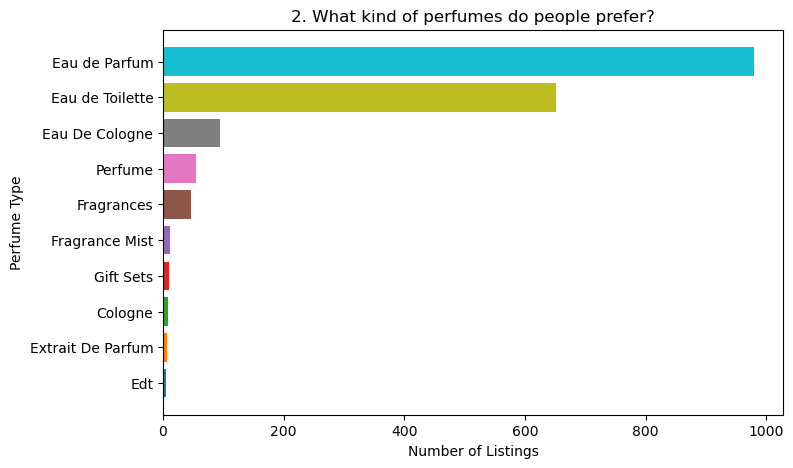

In [102]:
# create a Bar Chart for the top 10 perfume types
top_10_types = type_counts.head(10)

# plot the bar chart
fig, ax = plt.subplots(figsize=(8, 5))
colors = plt.cm.tab10(np.linspace(0, 1, len(top_10_types)))
ax.barh(top_10_types.index[::-1], top_10_types[::-1], color= colors)
ax.set_xlabel('Number of Listings')
ax.set_ylabel('Perfume Type')
ax.set_title('2. What kind of perfumes do people prefer?')

# show the bar chart
plt.show()

Result Explained:

979 listings are for Eau de Parfum, making it the most popular fragrance type. 
Eau de Toilette is also highly popular with 651 listings, making it the second most preferred type. Eau de Cologne (95 listings) have significantly fewer sales, Perfume (55 listings)
46 listings were classified under a general "Fragrances" category.


<div style="text-align:left; color:	#008080 ; font-size:15px">
<h3>3.Are men's perfumes more expensive than women's?</h3>
</div>

In [ ]:
price_comparison = combined_perfume.groupby('category')['price'].describe()
price_comparison

Result Explained:

The median price for men's perfumes is 35.71, while for women's perfumes, it is 32.99.
This suggests that, on average, men’s perfumes tend to be slightly more expensive than women’s.

Men's perfumes: The middle 50% of prices are between 22.99 and 59.00.
Women's perfumes: The middle 50% of prices are between 20.70 and 49.99.
The IQR is wider for men’s perfumes, indicating more variability in pricing.

If we look at the mean price and Standard Deviation
Average price (mean):
Men's perfumes: 46.48
Women's perfumes: 39.89
Price deviation (std):
Men's perfumes: 35.53
Women's perfumes: 29.07
Men’s perfumes have a higher average price and greater price variation.

The most expensive women’s perfume, priced at 299.99, is higher than the most expensive men’s perfume at 259.09, highlighting outliers in the data that suggest women’s perfumes may offer more premium or luxury options at the end of the price range.

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_perfume, x='category', y='price', palette='Set3')

# Labels and title
plt.xlabel('Gender Category')
plt.ylabel('Price ($)')
plt.title("3.Are men's perfumes more expensive than women's?")

# Show the plot
plt.show()

The boxplot compares the prices of men's and women's perfumes.
Both categories have similar median prices.
Men's perfumes show a slightly wider range of prices, with a few higher-priced outliers

Men’s perfumes tend to be priced higher on average and show greater price variation.
Women’s perfumes have a wider range, including cheaper budget options as well as high-end luxury perfumes.
Luxury options exist for both, but women's perfumes reach a higher max price ($299.99).

<div style="text-align:left; color:	#008080 ; font-size:15px">
<h3>4. How are perfume sales distributed across different countries? </h3>
</div>

In [ ]:
# split each string by the last comma, get the last part, and remove surrounding whitespace
combined_perfume['Country'] = combined_perfume['itemLocation'].str.split(',').str[-1].str.strip()

# group by country and calculate total sales
country_sales = combined_perfume.groupby('Country')['sold'].sum().reset_index()

# sort countries by total sales in descending order
country_sales = country_sales.sort_values('sold', ascending=False)
country_sales

Result explained:

The United States has the highest sales at 1,244,543 units, followed by Hong Kong with 3,442 units and China with 878 units. Other countries with significant sales include Canada (803 units), India (453 units), and Taiwan (362 units). Sales are much lower in countries like Brazil (177 units), Bulgaria (163 units), and Poland (100 units). The countries with the lowest sales include Israel (37 units), Portugal (30 units), Japan (24 units), and Pakistan (20 units).


In [ ]:
import plotly.express as px
# combine sales for "Estados Unidos" and "United States" - even if is 'Estados Unidos has 0
us_sales = country_sales.loc[country_sales['Country'].isin(['United States', 'Estados Unidos']), 'sold'].sum()

# update the sales value for "United States"
country_sales.loc[country_sales['Country'] == 'United States', 'sold'] = us_sales

# remove the duplicate entry
country_sales = country_sales[country_sales['Country'] != 'Estados Unidos'].copy()

# create a choropleth map
fig = px.choropleth(
    country_sales,
    locations='Country',
    locationmode='country names',
    color='sold',
    hover_name='Country',
    color_continuous_scale=px.colors.sequential.Teal,
    title='4. How are perfume sales distributed across different countries?'
)

# layout for better visualization
fig.update_layout(
    geo=dict(showframe=False,             
        showcoastlines=True,         
        projection_type='natural earth',  
        showland=True,              
        landcolor='lightgray',      
        showlakes=True,              
        lakecolor='lightblue',       
        showocean=True,              
        oceancolor='lightblue',      
        showcountries=True,          
        countrycolor='gray'),               
    margin={'r':0,'t':30,'l':0,'b':0}
)

fig.show()


In [ ]:
#save html file
fig.write_html('choropleth_map.html')

<div style="text-align:left; color:	#008080 ; font-size:15px">
<h3>5. Where are most sellers located? </h3>
</div>

In [ ]:
# extract location counts
location_counts = combined_perfume['itemLocation'].value_counts().head(10)
location_counts

In [ ]:
# create a horizontal bar plot for the Top 10 seller locations
fig, ax = plt.subplots(figsize=(9, 6))

# plot the data with reversed index and values, using a paired color palette
bars = ax.barh(location_counts.index[::-1], location_counts[::-1], color=plt.cm.Paired.colors)

# add value labels to the end of each bar
for bar in bars:
    ax.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, 
            f"{int(bar.get_width())}", ha='left', va='center', fontsize=10)

# labels and title
ax.set_xlabel("Number of Sellers")
ax.set_ylabel("Location")
ax.set_title("Top 10 Seller Locations for Perfumes")

# show the bar chart
plt.show()


Result explained:

The United States, with Dallas, Texas leading at 267 units sold. Other cities with significant sales include Hackensack, New Jersey with 190 units, and Brooklyn, New York with 111 units. Miami, Florida follows with 73 units, while Edison, New Jersey has 61 units sold. Cities like Detroit, Michigan and Houston, Texas each show 47 units sold, while New York, New York has 40 units. Katy, Texas and Warren, Michigan each contribute smaller amounts, with 40 and 32 units sold, respectively.


<div style="text-align:left; color:	#008080 ; font-size:15px">
<h3>6. Do perfumes with higher stock sell more? </h3>
</div>


In [ ]:
# calculate the correlation coefficient between stock available and units sold
corr_available_sold = combined_perfume["available"].corr(combined_perfume["sold"])
corr_available_sold

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined_perfume, x='available', y='sold', alpha=0.6, color='teal')

# Labels and title
plt.xlabel('Stock Available')
plt.ylabel('Units Sold')
plt.title('6. Do perfumes with higher stock sell more?')

# Show the plot
plt.show()

Result explained:

The correlation coefficient is 0.116, which is very weak and close to zero, this suggests almost no relationship between stock availability and the number of units sold.
Having a large stock does not necessarily mean higher sales. Sellers should not rely only on stock levels but also on pricing strategies, marketing, and product quality.
If we look at the scatter plot, points are spread out randomly instead of forming a clear trend. This confirms that stock is not the primary driver of sales performance. 


<div style="text-align:left; color:	#008080 ; font-size:15px">
<h3>7. Do budget perfumes sell more than luxury perfumes? </h3>
</div>

In [ ]:
# define a threshold to classify brands into luxury and budget segments
price_threshold = combined_perfume['price'].median()  # use the median price as a dividing line

# create a new column classifying brands as "Luxury" or "Budget"
combined_perfume['brand_category'] = np.where(combined_perfume['price'] > price_threshold, 'Luxury', 'Budget')

# aggregate sales by brand category
brand_sales_comparison = combined_perfume.groupby('brand_category')['sold'].sum()
brand_sales_comparison

In [ ]:
#check new col
combined_perfume.head()

In [ ]:
#create a bar plot to compare luxury vs. budget brands
plt.figure(figsize=(8, 5))
sns.barplot(x=brand_sales_comparison.index, y=brand_sales_comparison.values, palette=['#17becf', '#2ca02c'])

# labels and title
plt.xlabel('Brand Category')
plt.ylabel('Total Units Sold')
plt.title('7. Do budget perfumes sell more than luxury perfumes?')

# show the plot
plt.show()



Result explained:

Budget perfumes sold almost twice as much as luxury perfumes, with 819,817 vs. 431,216 units. This shows a price-sensitive market, where affordable options dominate. However, luxury perfumes still perform well, likely due to their higher profit margins.

**Conclusion**

***Key Findings:*** 

•⁠  ⁠Certain brands consistently dominate the market, showcasing strong brand influence.  
•⁠  ⁠Pricing does not significantly impact sales, but stock management plays a role.  
•⁠  ⁠Budget perfumes tend to outsell luxury perfumes, indicating a price-sensitive market.  
•⁠  ⁠Sales are concentrated in specific regions, offering expansion opportunities.  
